Import Packages

In [25]:
import numpy as np
import PIL
import pandas as pd
import os
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


Import Data

In [26]:
# Read CSV File
os.chdir(r'C:\Users\Drewster26\Desktop\Skin Lesion Project\Skin-Legion-Classification\GroundTruth')

df = pd.read_csv(r'GroundTruth.csv', dtype = str)

# Update Image Column title to include '.jpg'
df['image'] = df['image'].apply(lambda x: x+ '.jpg')

# Create New Dataframe for Neural Network Training
labels=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
label_list=[]
for i in range (len(df)):
    row = list(df.iloc[i])
    del row[0]
    index=np.argmax(row)
    label = labels[index]
    label_list.append(label)
df['label'] = label_list
df = df.drop(labels, axis=1)
 #print (df.head()) Validate Dataset is correct

os.chdir(r'C:\Users\Drewster26\Desktop\Skin Lesion Project\Skin-Legion-Classification')


Split Data into Test/Train

In [27]:
# Separate Images and Labels into Test & Training Datasets
train_split= .8 # set this to the percentof the data you want to use for training
valid_split= .15 # set this to the percent of the data you want to use for validation
test_split = 0.05 # percentage of data used for testing

train_df, dummy_df = train_test_split(df, train_size = train_split, shuffle = True, random_state = 7261)
test_df, valid_df = train_test_split(dummy_df, train_size = test_split, shuffle = True, random_state = 7261)

# Show number of each class present in each dataset
#print(' train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))  
#print (train_df.head())
#print (train_df['label'].value_counts())
#print (train_df['image'].value_counts())

Visualize Images & Labels

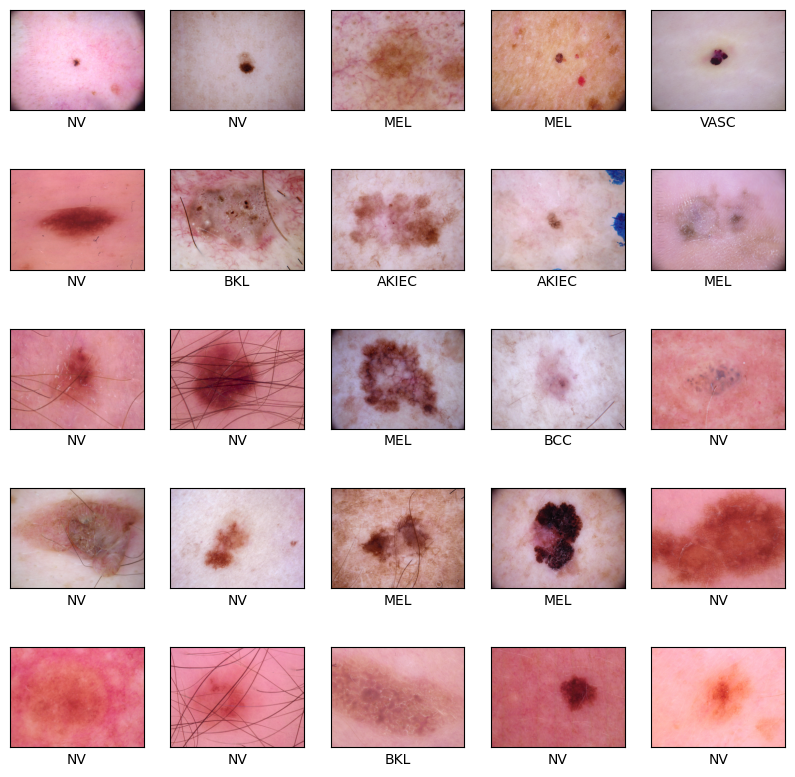

In [28]:
# Change Working Directory to Image Folder -> Overcomes string error in Display
os.chdir(r'C:\Users\Drewster26\Desktop\Skin Lesion Project\Skin-Legion-Classification\images')

# Display First 25 images from training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    file_path = str(train_df.iloc[i]['image'])

    img = plt.imread(file_path)
    plt.imshow(img)
    
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(str(train_df.iloc[i]['label']))
plt.show()

# Change Working Directory Back to Main -> Overcomes string error in Display
os.chdir(r'C:\Users\Drewster26\Desktop\Skin Lesion Project\Skin-Legion-Classification')

Create CNN Model

In [29]:

# *Update Image Storage for training *

# Create Convolutional Base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(600, 450, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile and Train Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Troubleshoot Loading Data

In [31]:
# Change Working Directory to Image Folder -> Overcomes string error in Display
os.chdir(r'C:\Users\Drewster26\Desktop\Skin Lesion Project\Skin-Legion-Classification\images')

print(type(train_df))

#print(train_df).loc['image',:]

                 image label
1945  ISIC_0026251.jpg    NV
694   ISIC_0025000.jpg    NV
2505  ISIC_0026811.jpg   MEL
7914  ISIC_0032220.jpg   MEL
2904  ISIC_0027210.jpg  VASC
...                ...   ...
8663  ISIC_0032969.jpg    NV
4000  ISIC_0028306.jpg   MEL
4983  ISIC_0029289.jpg   BKL
6740  ISIC_0031046.jpg    NV
262   ISIC_0024568.jpg    NV

[8012 rows x 2 columns]


AttributeError: 'NoneType' object has no attribute 'loc'

Train CNN Model

In [ ]:
# Change Working Directory to Image Folder -> Overcomes string error in Display
os.chdir(r'C:\Users\Drewster26\Desktop\Skin Lesion Project\Skin-Legion-Classification\images')

history = model.fit(train_df.loc[:,['image']], train_df.loc[:,['label']], epochs=10, 
                    validation_data=(valid_df.loc[:,['image']], valid_df.loc[:,['label']]))

# Training Plot

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate Model
test_loss, test_acc = model.evaluate(test_df.loc[:,['image']], test_df.loc[:,['label']], verbose=2)

print(test_acc)